In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import random
import cv2
import sys
sys.path.insert(0, 'py_scripts/') 

import torch
from Image_Sampler import Sampler

# Sampling Section

In [ ]:
# sampler = Sampler(s_width=100, s_height=100, cam_height=4, cam_zoom=50, cam_rotation=-18)
# sampler = Sampler(s_width=256, s_height=256, cam_height=4, cam_zoom=130, cam_rotation=-90) #top-down

In [5]:
# sampler = Sampler(s_width=256, s_height=256, cam_height=4, cam_zoom=50, cam_rotation=-12)
sampler = Sampler(s_width=256, s_height=256, cam_height=4.5, cam_zoom=130, cam_rotation=-90)

In [ ]:
img, seg = sampler.sample()

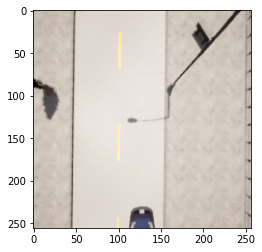

In [6]:
sampler.show_Example(random_spawn=True, segmentation=False)

In [ ]:
seg[0]

In [ ]:
mask = np.zeros((512,512,3))
for x in range(len(seg)):
    for y in range(len(seg[x])):
        chunk = seg[x][y][0]
        if chunk == 7:
            mask[x][y][0] = 1
            print("sgf")
        if chunk == 8:
            mask[x][y][2] = 1

In [ ]:
plt.imshow(img)

In [ ]:
mask = mask.astype("float32")

In [ ]:
plt.imshow(mask)

In [ ]:
mask[0]

In [4]:
images, seg = sampler.sample_Ride(world_model="Town01_Opt", num_of_snaps=10, tick_rate=1, anomaly=True)

In [ ]:
for img in images:
    plt.imshow(img)
    plt.show()

In [11]:
seg[9][250][250]

array([ 0.,  0., 20.], dtype=float32)

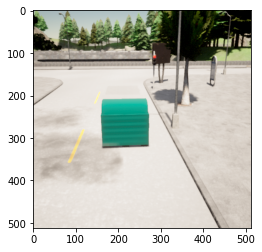

In [10]:
plt.imshow(images[9])

# Loading Section

In [3]:
images = Sampler.load_Images("/disk/vanishing_data/is789/anomaly_samples/Samples_2022-09-02_11:06:21/", size=40)

Loaded 40 images | width = 256, height = 256, channels = 3


In [ ]:
images = images[:,:,:,:3]

In [ ]:
images[0].shape

In [6]:
paths = Sampler.get_image_paths("/disk/vanishing_data/is789/anomaly_samples/Samples_2022-08-31_18:12:29/")

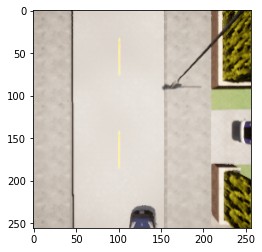

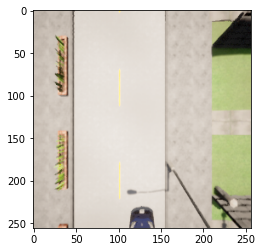

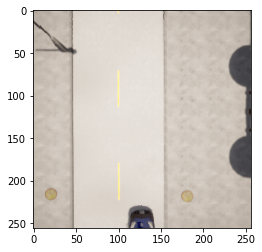

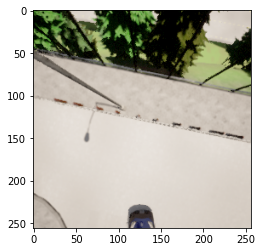

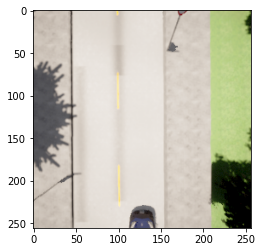

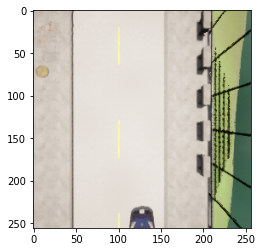

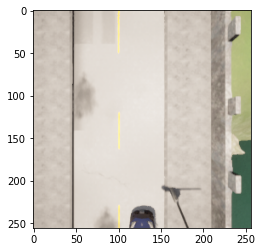

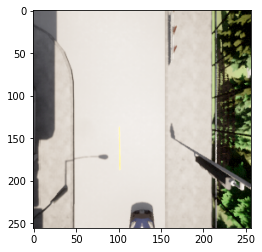

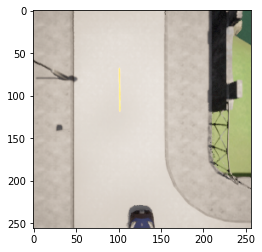

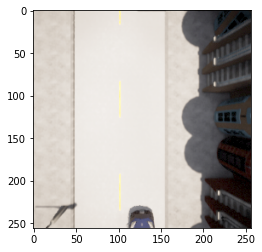

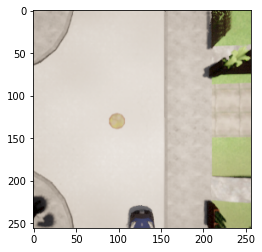

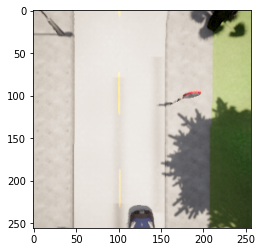

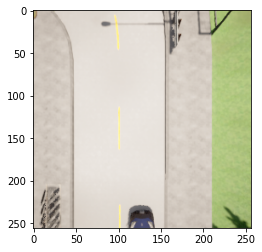

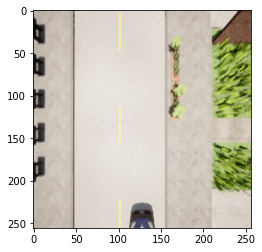

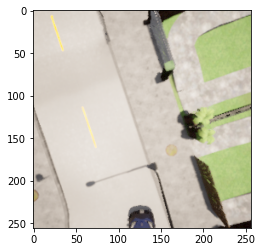

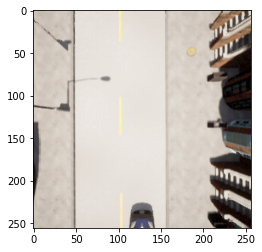

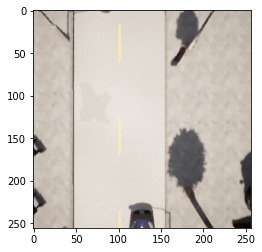

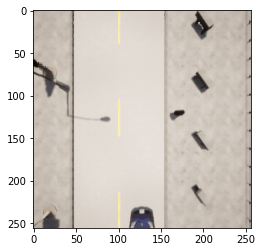

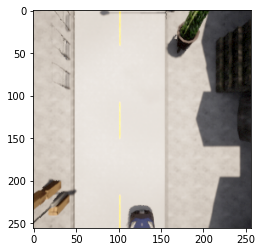

In [4]:
for x in range(0,19):
    plt.imshow(images[x])
    plt.show()

In [ ]:
Sampler.sample_from_Set(images)

In [22]:
plt.imshow(images[4])

IndexError: index 4 is out of bounds for axis 0 with size 4

In [6]:
def process_image(image):
    "Processes the image"
    image.resize((256, 256), Image.ANTIALIAS) # or whatever you are doing to the image
    return image

In [7]:
xx = process_image(images[0])

NameError: name 'Image' is not defined

In [ ]:
img = np.array(images[10])
plt.imshow(img)

In [ ]:
recon = np.array(img)
recon[250:310,200:350,:] = 0.0
plt.imshow(recon)

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [ ]:
g1 = rgb2gray(img)
g2 = rgb2gray(recon)
g3 = abs(g1-g2)

In [ ]:
g3 = g3.astype("float32") /255

In [ ]:
hm = np.zeros((512,512,3))
hm = hm.astype("float32")
for x in range(len(hm)):
    for y in range(len(hm[x])):
        if g3[x][y] < 0.5:
            hm[x][y][2] = 1
            hm[x][y][1] = 2*g3[x][y]
            hm[x][y][0] = 2*g3[x][y]
        else:
            hm[x][y][0] = 1
            hm[x][y][1] = 1 - 2*(g3[x][y] - 0.5)
            hm[x][y][2] = 1 - 2*(g3[x][y] - 0.5)
#         hm[x][y][2] = 1 - 2*g3[x][y]
#         if hm[x][y][2] < 0.:
#             hm[x][y][2] = 0.
#             hm[x][y][0] = 2*g3[x][y]

In [ ]:
bar = np.zeros((450,50,3))
ll = np.linspace(0,1,450)
for y in range(len(bar)):
    if ll[y] < 0.5:
        bar[y,:,2] = 1
        bar[y,:,1] = 2*ll[y]
        bar[y,:,0] = 2*ll[y]
    else:
        bar[y,:,2] = 1 - 2*(ll[y] - 0.5)
        bar[y,:,1] = 1 - 2*(ll[y] - 0.5)
        bar[y,:,0] = 1
        
bar[bar > 0.99] = 0.99
padd = np.zeros((31,50,3)) + 1.0
bar = np.vstack((padd, bar, padd))

In [ ]:
plt.imshow(bar)
plt.axis("off")

In [ ]:
padding = np.zeros((512,35,3)).astype("float32")
padding = padding + 1.0

In [ ]:
heatmap = np.hstack((hm,padding,bar))
plt.imshow(heatmap)

In [ ]:
errorMatrix = (img - recon)
errorAvg = np.sum(errorMatrix) / (errorMatrix.shape[0] * errorMatrix.shape[1] * errorMatrix.shape[2])
errorAvg = int(errorAvg * 100000)/ 100000.0

In [ ]:
err = np.linspace(0,1,10)

from matplotlib.pyplot import figure

figure(figsize=(5.12, 5.12), dpi=100)
plt.plot(err, lw=3)
plt.xlim(-5, 140)
plt.savefig("heatmap.png")

In [ ]:
def test():
    
    fig = plt.figure(figsize=(5.12, 4.12), dpi=100) # this is imp for sizing
    # plot
    plt.plot(err, color="black")
    # get image as np.array
    canvas = plt.gca().figure.canvas
    canvas.draw()
    data = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
    image = data.reshape(canvas.get_width_height()[::-1] + (3,))
    print(type(image[0][0][0]))
    cv2.imwrite("test.png", image)
    return image

In [ ]:
aa = []
for x in range(1):
    aa.append(test())

In [ ]:
plt.imshow(aa[3])

In [ ]:
fig.clear()

In [ ]:
image.shape

In [ ]:
import cv2
kk = np.array(cv2.imread("heatmap.png"))
kk.shape

In [ ]:
import seaborn as sb
figure(figsize=(5.12, 5.12), dpi=100)
hm = sb.heatmap(g3, xticklabels=False, yticklabels=False)
plt.savefig("heatmap.png", bbox_inches='tight', pad_inches = 0)

In [ ]:
kk = cv2.imread("heatmap.png")
plt.imshow(kk)

In [ ]:
kk.shape

In [ ]:
image_index = 1828
storagePath = "/disk/vanishing_data/is789/anomaly_samples/2500train/"

In [ ]:
import cv2
images = np.array(images)
images = (images * 255).astype("int")
for k in range(len(images)):
    cv2.imwrite(storagePath + f"snap_{image_index}.png", images[k]) 
    # plt.imsave(storagePath + f"snap_{image_index}.png",images[k], format="png")
    image_index = image_index + 1

In [ ]:
def convert_pic_to_row(pic):
    output = []
    for col in(pic):
        temp = []
        for x in range(len(col)):
            row = col[x]
            temp = np.concatenate((temp,row), axis=None)
        output = np.concatenate((output,temp), axis=None)

    result = np.array(output)
    result = result.astype(int)
    return result

In [ ]:
import csv

f = open("./test.csv", 'w')

with f:

    writer = csv.writer(f)
    
    for image in images:
        image = convert_pic_to_row(image)
        writer.writerow(image)

In [ ]:
test = convert_pic_to_row(images[0])
test

In [ ]:
import cv2 

In [ ]:
images = np.array(images)

In [ ]:
k = (images * 255).astype("int")

In [ ]:
import PIL


In [ ]:
cv2.imwrite("test.png", k[10]) 

In [ ]:
img = cv2.imread("test.png")

In [ ]:
plt.imshow(img)

In [ ]:

def load_img_csv(path): 
    f = open("./test.csv", 'r')

    loaded_state = []
    result = []


    with f:

        reader = csv.reader(f)

        for row in reader:
            temp = []
            for e in row:
                temp.append(e)
            loaded_state.append(temp)

    return loaded_state

In [ ]:
kappa = load_img_csv("s")

In [ ]:
matrix = np.eye(256, 256, dtype=np.uint8)*255
matrix = np.concatenate((np.atleast_3d(matrix), np.zeros((256, 256, 2), dtype=np.uint8)), axis=2)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(range(10), 'b+')

In [ ]:
from PIL import Image
def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img

In [ ]:
img = fig2img(fig)

In [ ]:
type(img)

In [ ]:
image_open = Image.open("test.png")
type(image_open)

In [ ]:
plt.imshow(img)

In [ ]:
import cv2
import PIL
fig.savefig("test.png")
img = cv2.imread("test.png")
# img = PIL.Image.fromarray(img)

In [ ]:
img = PIL.Image.frombytes('RGB', 
fig.canvas.get_width_height(),fig.canvas.tostring_rgb())

In [ ]:
plt.imshow(img)

In [ ]:
# Make a random plot...
fig = plt.figure()
fig.add_subplot(111)

# If we haven't already shown or saved the plot, then we need to
# draw the figure first...
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [ ]:
k = np.zeros((50,50,3))
plt.imshow(k)

In [ ]:
fig = plt.figure()
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

In [ ]:
data.shape

In [7]:
k = np.zeros((3,2,2)).astype("float32")

In [8]:
k[0][k[0] == 0] = 1
k[1][k[1] == 0] = 2
k[2][k[2] == 0] = 3

In [11]:
k = np.zeros((512,512,3))

In [12]:
k = np.transpose(k, (2,1,0))

In [14]:
k = np.array([1,2,3])
z = k
k = np.array([1,1,1])
print(z)

[1 2 3]


In [3]:
def get_median_set(values):
    median = np.median(values)
    values = list(values)
    upperSplit = []
    lowerSplit = []
    for value in values:
        if value > median:
            upperSplit.append(value)
        else:
            lowerSplit.append(value)

    return median, np.array(lowerSplit), np.array(upperSplit)

In [5]:
x = np.array([1,2,3,4,5,6,7,8,9])
a, b, c = get_median_set(x)

In [4]:
c = np.array([0,1])
len(c)

2